In [1]:
import torch

In [4]:
class sgd:
    def __init__(self, params,
                 lr = 0.01,
                 momentum = 0.0,
                 dampening = 0.0,
                 weight_decay = 0.0,
                 nesterov = False):
        self.params = list(params)
        self.lr = lr
        self.momentum = momentum
        self.dampening = dampening
        self.weight_decay = weight_decay
        self.nesterov = nesterov

        # initialize momentum buffers
        self.state = {id(p):{'momentum_buffer': torch.zeros_like(p)} for p in self.params if self.momentum !=0}

    def step(self):
        for p in self.params:
            if p.grad is None:
                continue
        
        grad = p.grad.data

        # weight decay
        if self.weight_decay != 0:
            grad = grad.add(self.weight_decay, p.data)
        if self.momentum !=0:
            buf = self.state[id(p)]['momentum_buffer']
            buf.mul_(self.momentum).add_(1 - self.dampening, grad)
            if self.nesterov:
                grad = grad.add(self.momentum, buf)
            else:
                grad = buf
        
        # parameter update
        p.data.add_(-self.lr, grad)
            
    def zero_grad(self):
        for p in self.params:
            if p.grad is not None:
                p.grad.detach_()
                p.grad.zero_()

c:\Users\david.andai\OneDrive - Aga Khan University\Documents\PROJECTS\Neuro Projects\hopfield_is_all_you_need\.venv\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([10000, 3])) that is different to the input size (torch.Size([10000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


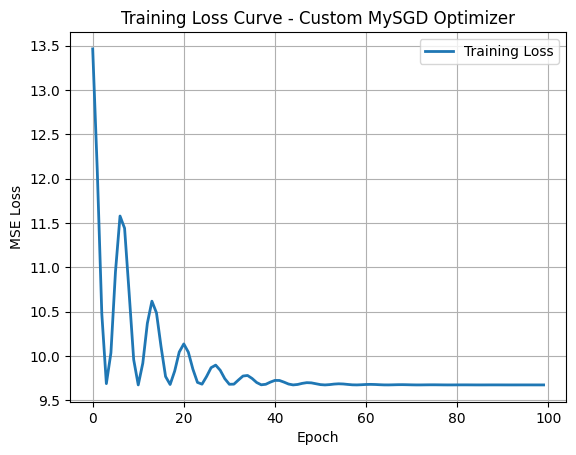

In [9]:
import matplotlib.pyplot as plt

# example model and data
model = torch.nn.Linear(3, 1)

x = torch.randn(10000, 3)
y = 3 * x + 2 + 0.5 * torch.randn(10000, 1) ## 3x + 2 + noise

optimizer = sgd(model.parameters(), lr=0.1, momentum=0.9)
criterion = torch.nn.MSELoss()

# save losses
losses = []

for epoch in range(100):
    y_pred = model(x)
    loss = criterion(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

# Plot training loss
plt.plot(losses, label="Training Loss", linewidth=2)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss Curve - Custom MySGD Optimizer")
plt.legend()
plt.grid(True)
plt.show()
